<a href="https://colab.research.google.com/github/tejash2005/Capstone_project/blob/main/CAPSTONE_PROJECT_0_689.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/JPN Data.xlsx'
file_path1='/content/drive/My Drive/IN_Data.xlsx'
japanese_df = pd.read_excel(file_path)
indian_df = pd.read_excel(file_path1)

print("Japanese Data Shape:", japanese_df.shape)
print("Indian Data Shape:", indian_df.shape)

japanese_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Japanese Data Shape: (40000, 6)
Indian Data Shape: (70000, 5)


,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [ ]:
print("misssing values in the JPN data set:")
print(japanese_df.isnull().sum())
print("data types in JPN data set:")
print(japanese_df.dtypes)

misssing values in the JPN data set:
ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64
data types in JPN data set:
ID             object
CURR_AGE        int64
GENDER         object
ANN_INCOME    float64
AGE_CAR         int64
PURCHASE        int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X = japanese_df.drop('PURCHASE', axis=1)
y = japanese_df['PURCHASE']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (32000, 5)
Test size: (8000, 5)


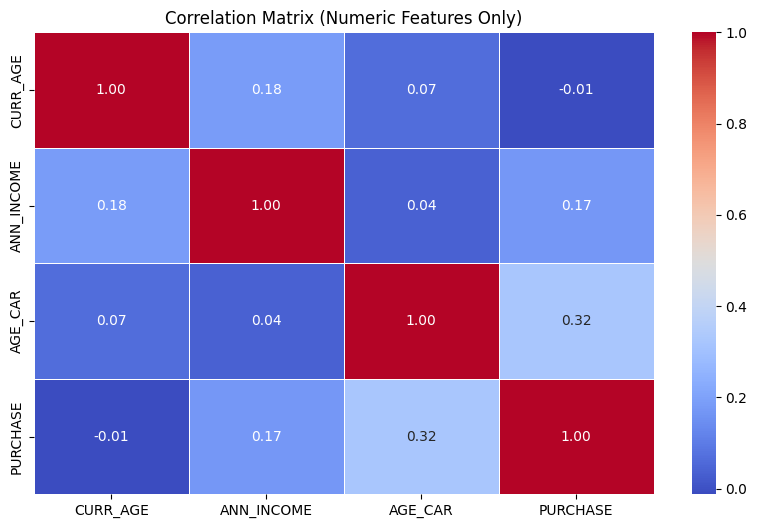

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = japanese_df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


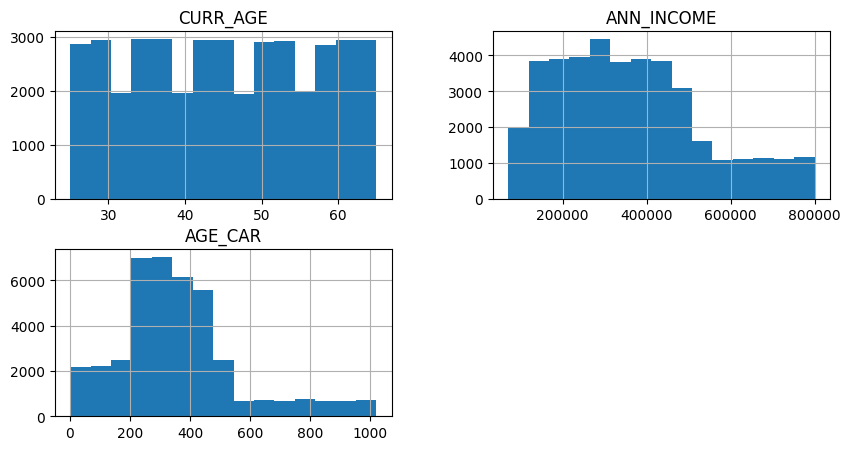

In [ ]:
# Plot histograms
japanese_df[['CURR_AGE', 'ANN_INCOME', 'AGE_CAR']].hist(bins=15, figsize=(10, 5))
plt.show()


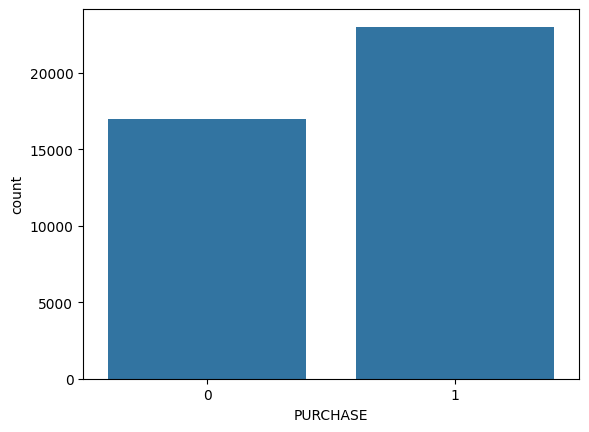

In [ ]:
sns.countplot(x='PURCHASE', data=japanese_df)
plt.show()


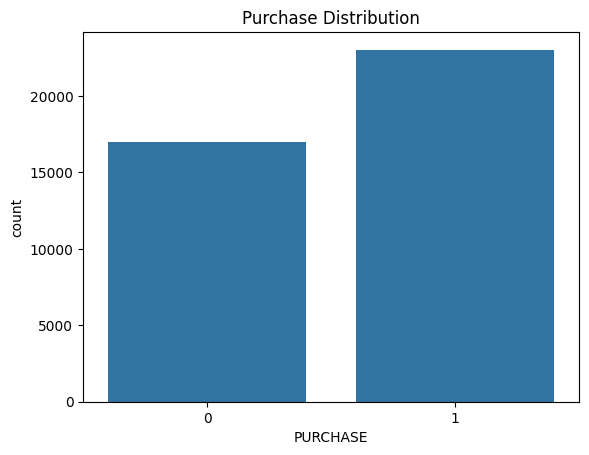

🔸 Random Forest Results:
Accuracy: 0.67175
Confusion Matrix:
 [[2024 1325]
 [1301 3350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      3349
           1       0.72      0.72      0.72      4651

    accuracy                           0.67      8000
   macro avg       0.66      0.66      0.66      8000
weighted avg       0.67      0.67      0.67      8000



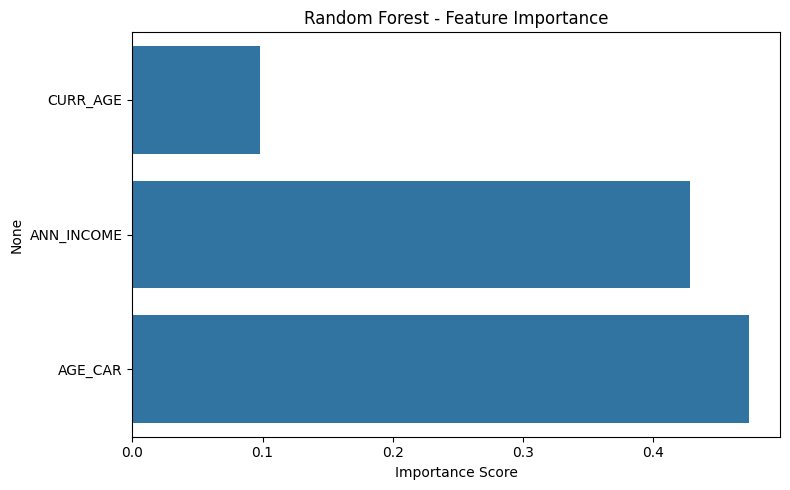

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:50:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Results:
Accuracy: 0.683875
Confusion Matrix:
 [[2134 1215]
 [1314 3337]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      3349
           1       0.73      0.72      0.73      4651

    accuracy                           0.68      8000
   macro avg       0.68      0.68      0.68      8000
weighted avg       0.69      0.68      0.68      8000



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

# Countplot (assuming you ran this already)
sns.countplot(x='PURCHASE', data=japanese_df)
plt.title("Purchase Distribution")
plt.show()

# Split features and target
X = japanese_df.drop('PURCHASE', axis=1)
y = japanese_df['PURCHASE']

# Drop non-numeric (useless) columns like IDs or strings
X = X.select_dtypes(include=['int64', 'float64'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# ✅ RANDOM FOREST MODEL
# =========================
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred_rf = rf_model.predict(X_test_scaled)

print("🔸 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance (Random Forest)
feature_importance_rf = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_rf, y=features)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# =========================
# ✅ XGBOOST MODEL
# =========================
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("🔹 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
